In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_color_codes("pastel")

In [3]:
df = pd.read_json('dataset.json.gzip', compression='gzip').reset_index(drop=True)
df.head()

,date,user,candidate,estado,location,retweet_count,favorite_count,full_text
0,2018-10-07 00:00:02,Andrea Pereira,#ViraViraCIRO,Não Informado,,1,0,#ViraViraCIRO #ciro12 #CiroSim https://t.co/KO...
1,2018-10-07 00:00:02,Ivan Brazil,#EleNão,SP,"Sorocaba, Brasil",0,0,"Amanhã não esqueça. Ou vc vota Ciro 12, ou que..."
2,2018-10-07 00:00:09,But What The Hell,#EleNão,SP,"São Paulo, Brasil",0,0,"Mano meu dia se resumiu em: twitter, #EleNao, ..."
3,2018-10-07 00:01:25,Resistência 🌈,#EleNão,BA,"Salvador, Brasil",0,0,Pra ficar postando #EleSim nas redes sociais t...
4,2018-10-07 00:15:11,Jane Eyre Queiroz,#ViraViraCIRO,Não Informado,,0,0,"Eu gosto do meu Candidato, porque ele trás det..."


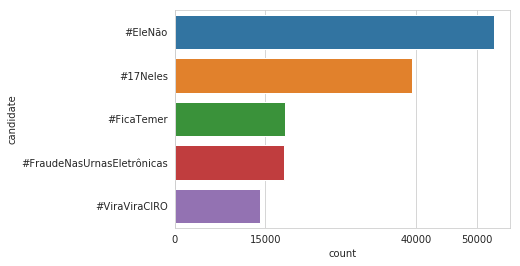

In [4]:
sns.set_style("whitegrid")
sns.countplot(y='candidate', data=df, order= df['candidate'].value_counts().index)\
    .set_xticks([0,15000, 40000, 50000])
plt.show()

In [5]:
df['hour'] = df.date.dt.hour
tweets_hour = df.groupby('hour', as_index=False)['user'].count()

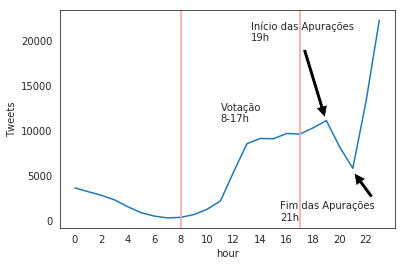

In [6]:
sns.set_style("white")
sns.lineplot(x='hour', y='user', data=tweets_hour).set(xticks = np.arange(0,24,2),
                                                       yticks = np.arange(0,25000,5000),
                                                       ylabel='Tweets')
plt.axvline(8, color='r')
plt.axvline(17, color='r')
plt.annotate('Início das Apurações\n19h', xy=(19, 11000), xytext=(13.3, 20000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Fim das Apurações\n21h', xy=(21, 5500), xytext=(15.5, 0), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Votação\n8-17h', xy=(10, 10000), xytext=(11, 11000))
plt.show()

In [7]:
tweets_hour_cand = df.groupby(['hour', 'candidate'], as_index=False)['user'].count()

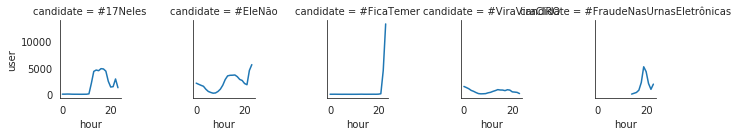

In [48]:
sns.relplot(kind='line', x='hour', y='user', col='candidate', data=tweets_hour_cand, legend= 'full',height=2).set()
plt.show()